In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train[0].min(), X_train[0].max()


(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

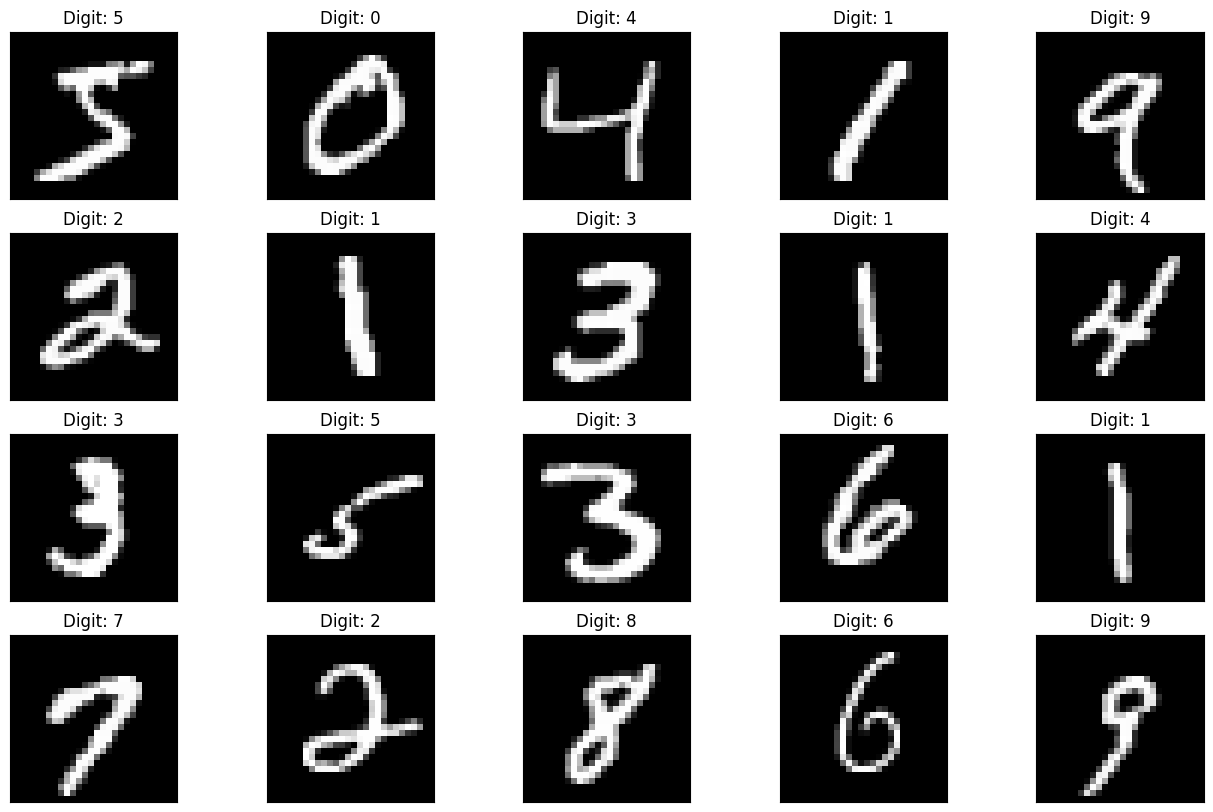

In [ ]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer,
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]
)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 53s 27ms/step - loss: 0.2322 - accuracy: 0.9312
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0739 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0480 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0136 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0097 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0075 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 34s 18m

1/1 [==============================] - 0s 25ms/step


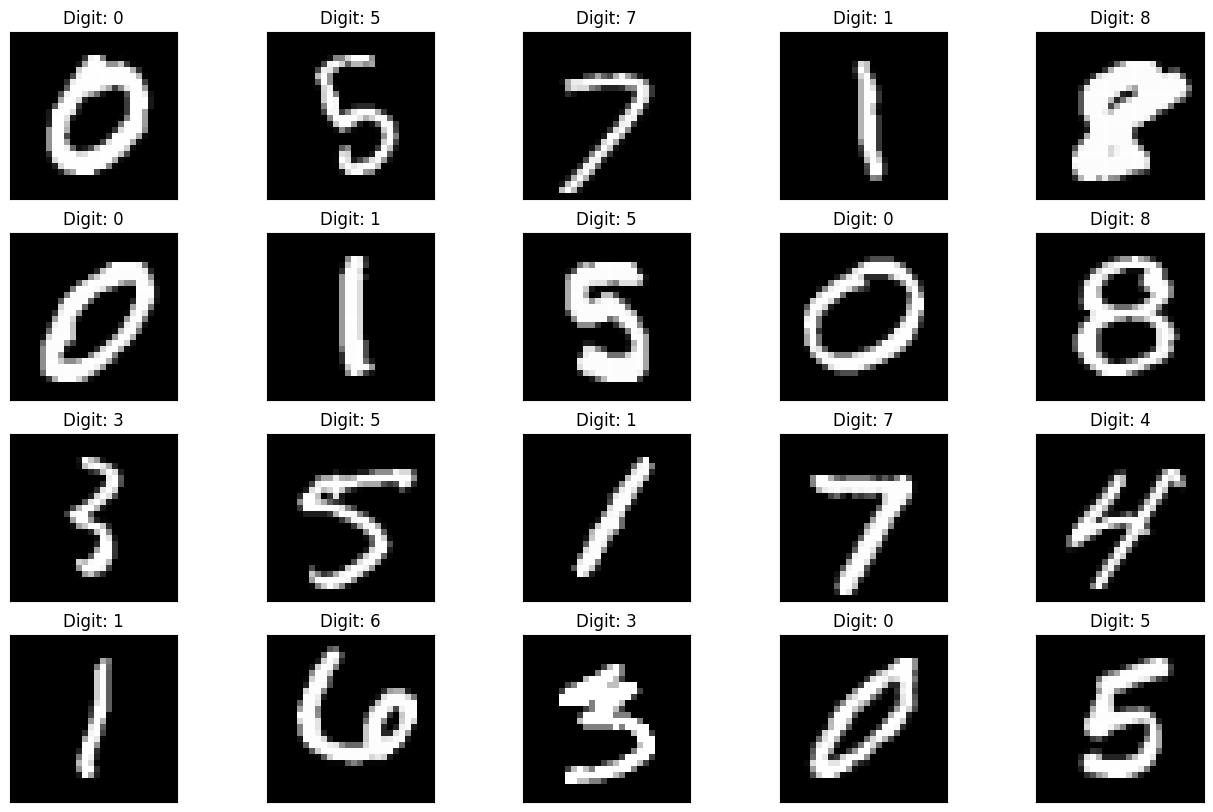

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0],axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 6ms/step


0.9876

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04470955953001976
Test accuracy: 0.9876000285148621


NameError: ignored

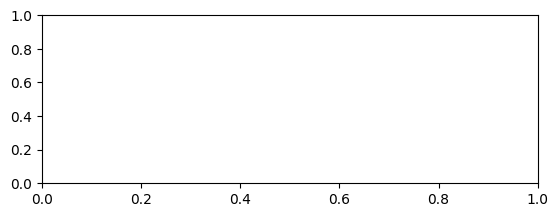

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()